## Initialization
---

In [33]:
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt


## Data Loading & Cleaning
---

In [34]:
DATA_DIR = os.getcwd()

filenames = glob.glob(DATA_DIR + "/data/*.csv")

# Combine all top100 CSV into one df with each timestamp (Delete full combined dataframe before running!)
dfs = []
for filename in filenames:  
    tmp = pd.read_csv(filename)

    file_name = os.path.splitext(os.path.basename(filename))[0]
    timestamp = file_name[14:]
    tmp['timestamp'] = timestamp

    dfs.append(tmp)

top100 = pd.concat(dfs, ignore_index=True)


In [35]:
print(top100.head(1))
print(len(top100)) # One Top100 is has only 99 rows

   Unnamed: 0           id    user_id user_name  game_id  type  \
0           0  39372082478  124420521       LCS  21779.0  live   

                                            title  viewer_count  \
0  LCS Playoffs: Team Liquid vs. Golden Guardians        112074   

             started_at language  \
0  2020-08-21T22:05:20Z       en   

                                       thumbnail_url  \
0  https://static-cdn.jtvnw.net/previews-ttv/live...   

                                             tag_ids            timestamp  
0  ['6ea6bca4-4712-4ab9-a906-e3336a9d8039', '36a8...  2020_08_22_00_35_36  
1299


In [36]:
# Removing unimportant cols
top100 = top100.drop(['game_id', 'title', 'started_at', 'thumbnail_url', 'tag_ids'], axis = 1)

In [37]:
# Rename unnamed col to ranking
top100.rename(columns={'Unnamed: 0':'ranking'}, inplace=True )
print(list(top100))

['ranking', 'id', 'user_id', 'user_name', 'type', 'viewer_count', 'language', 'timestamp']


In [38]:
# Fixing data types
print(top100.dtypes)
top100['user_name'] = top100['user_name'].astype(str)
top100['type'] = top100['type'].astype('category') 
top100['language'] = top100['language'].astype('category') 
top100['timestamp'] = pd.to_datetime(top100["timestamp"], format = "%Y_%m_%d_%H_%M_%S")
print(top100.dtypes)


ranking          int64
id               int64
user_id          int64
user_name       object
type            object
viewer_count     int64
language        object
timestamp       object
dtype: object
ranking                  int64
id                       int64
user_id                  int64
user_name               object
type                  category
viewer_count             int64
language              category
timestamp       datetime64[ns]
dtype: object


In [39]:
# Checking NAs
print(top100.isnull().sum())


ranking         0
id              0
user_id         0
user_name       0
type            0
viewer_count    0
language        0
timestamp       0
dtype: int64


## Data Understanding
---

In [40]:
# Number of streamers
print(top100['user_name'].value_counts())

Dota2RuHub         13
Gaules             13
GamesDoneQuick     13
xQcOW              12
WePlayEsport_EN    12
                   ..
aminematue          1
k1ng                1
XaKoH               1
FlowPodcast         1
한국프로야구2             1
Name: user_name, Length: 529, dtype: int64


In [41]:
# Different languages
print(top100['language'].value_counts())

en    628
es    133
ko    109
pt    108
ru     66
fr     64
de     52
zh     46
ja     33
tr     24
it     12
pl     11
ar      5
th      4
cs      4
Name: language, dtype: int64


In [42]:
# Different types 
print(top100['type'].value_counts()) # all live

live    1299
Name: type, dtype: int64


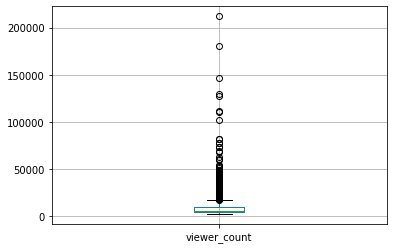

In [43]:
top100.boxplot(['viewer_count'])

In [44]:
top100

,ranking,id,user_id,user_name,type,viewer_count,language,timestamp
0,0,39372082478,124420521,LCS,live,112074,en,2020-08-22 00:35:36
1,1,39363352430,22510310,GamesDoneQuick,live,68353,en,2020-08-22 00:35:36
2,2,395734242,39276140,Rubius,live,59623,es,2020-08-22 00:35:36
3,3,39370454542,122375217,negaoryx,live,46860,en,2020-08-22 00:35:36
4,4,39370827390,37402112,shroud,live,45084,en,2020-08-22 00:35:36
...,...,...,...,...,...,...,...,...
1294,95,2499503793,44099416,Rakin,live,3822,pt,2020-08-23 00:30:10
1295,96,39383431550,456427110,BeatportOfficial,live,3774,en,2020-08-23 00:30:10
1296,97,39381754334,24765850,餐餐自由配,live,3766,zh,2020-08-23 00:30:10
1297,98,402016162,68062590,iGeStarK,live,3718,es,2020-08-23 00:30:10


## Combination with the remaining data
---

In [45]:
### Combine with follower count
foldernames = glob.glob(DATA_DIR + "/data/*/")

# Add empty total col
top100['follower_count'] = 0

# Combine all top100 CSV into one df with each timestamp
for folder in foldernames:  
    tmp = pd.read_csv(folder + '/follower.csv')

    userID = tmp['user_id'].item()
    followerCount = tmp['total'].item()

    # Set followercount in top100 for specific user
    top100.loc[(top100.user_id == userID), 'follower_count'] = followerCount
    

In [52]:
top100.sort_values('follower_count', ascending=False).tail(20) 
# Streams with way more viewers than followers. Probably viewbotting!

,ranking,id,user_id,user_name,type,viewer_count,language,timestamp,follower_count
1096,97,399614114,72726363,edopeh,live,3778,de,2020-08-22 20:30:09,2433
1174,75,399614114,72726363,edopeh,live,5200,de,2020-08-22 22:30:09,2433
1268,69,2499153105,509158590,djhernancattaneo,live,5030,en,2020-08-23 00:30:10,1549
927,28,402599058,244981360,Melaningamers,live,11389,en,2020-08-22 18:30:59,1125
512,12,398589266,202693137,dronechampionsleague,live,7965,en,2020-08-22 10:31:46,885
759,59,398589266,202693137,dronechampionsleague,live,3814,en,2020-08-22 14:31:51,885
611,11,398589266,202693137,dronechampionsleague,live,8829,en,2020-08-22 12:31:36,885
1273,74,39382751854,571077589,bigdaddyeic,live,4399,en,2020-08-23 00:30:10,85
970,71,402059714,565678744,footballe13,live,5474,en,2020-08-22 18:30:59,83
958,59,402757474,549779384,rpl104,live,6260,en,2020-08-22 18:30:59,55


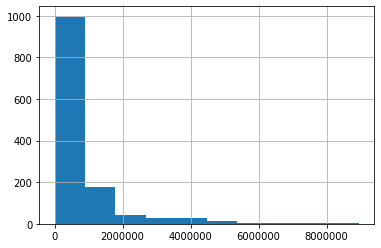

In [53]:
top100['follower_count'].hist()

In [54]:
### Combine with clips (Some streamer have no clips or videos. )
# Number of Clips, AVG. Viewcount, Highest Viewcount, Lowest Viewcount

# Add empty total cols
top100['clip_count'] = 0
top100['mostviewed_clip'] = 0
top100['lowestviewed_clip'] = 0
top100['avgviews_clips'] = 0

for folder in foldernames:
    tmp = pd.read_csv(folder + '/clips.csv')

    if len(tmp) != 0:
        userID = tmp.iloc[0, 4]
        clip_count = len(tmp)
        mostviewed_clip = tmp['view_count'].max()
        lowestviewed_clip = tmp['view_count'].min()
        avgviews_clips = tmp['view_count'].mean()

        top100.loc[(top100.user_id == userID), 'clip_count'] = clip_count
        top100.loc[(top100.user_id == userID), 'mostviewed_clip'] = mostviewed_clip
        top100.loc[(top100.user_id == userID), 'lowestviewed_clip'] = lowestviewed_clip
        top100.loc[(top100.user_id == userID), 'avgviews_clips'] = avgviews_clips

In [55]:
top100.sort_values('clip_count', ascending=False).tail(20) 
# A few streamers with no clips. Could be a problem with the pulling process or the streamer had no clips at the time.

,ranking,id,user_id,user_name,type,viewer_count,language,timestamp,follower_count,clip_count,mostviewed_clip,lowestviewed_clip,avgviews_clips
866,66,39380606302,570951515,bigdaddyrpx,live,4059,en,2020-08-22 16:31:03,29,4,2,1,1.25
1273,74,39382751854,571077589,bigdaddyeic,live,4399,en,2020-08-23 00:30:10,85,2,9,4,6.50
461,61,39379476110,570906972,bigdaddyejc,live,3191,en,2020-08-22 08:31:11,7,1,1,1,1.00
396,96,397578658,570172399,faceit_rex,live,2745,en,2020-08-22 06:31:02,10,0,0,0,0.00
1022,23,401883634,35980866,Perxitaa,live,17975,es,2020-08-22 20:30:09,711415,0,0,0,0.00
57,57,39371002462,26946000,Nightblue3,live,5600,en,2020-08-22 00:35:36,2642381,0,0,0,0.00
870,70,398986034,48865821,Staiy,live,3995,de,2020-08-22 16:31:03,259871,0,0,0,0.00
1208,9,39384609662,142055874,lolesportsla,live,20317,es,2020-08-23 00:30:10,187471,0,0,0,0.00
445,45,39358423630,232672264,Insomniac,live,3954,en,2020-08-22 08:31:11,299409,0,0,0,0.00
240,40,39373496750,26946000,Nightblue3,live,6229,en,2020-08-22 04:31:17,2642381,0,0,0,0.00


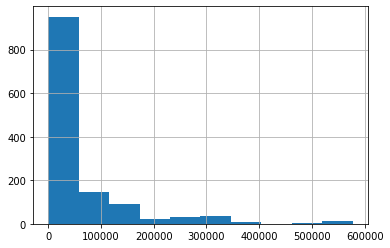

In [56]:
top100['avgviews_clips'].hist()

In [57]:
### Combine with videos
# Number of Videos, AVG. Viewcount, Highest Viewcount, Lowest Viewcount

# Add empty total cols
top100['video_count'] = 0
top100['mostviewed_video'] = 0
top100['lowestviewed_video'] = 0
top100['avgviews_video'] = 0

for folder in foldernames:
    tmp = pd.read_csv(folder + '/videos.csv')
    
    if len(tmp) != 0:
        userID = tmp.iloc[0, 2]
        video_count = len(tmp)
        mostviewed_video = tmp['view_count'].max()
        lowestviewed_video = tmp['view_count'].max()
        avgviews_video = tmp['view_count'].max()

        top100.loc[(top100.user_id == userID), 'video_count'] = video_count
        top100.loc[(top100.user_id == userID), 'mostviewed_video'] = mostviewed_video
        top100.loc[(top100.user_id == userID), 'lowestviewed_video'] = lowestviewed_video
        top100.loc[(top100.user_id == userID), 'avgviews_video'] = avgviews_video

In [63]:
top100.sort_values('video_count', ascending=False).tail(20) 
# A few streamers with no videos. Probably protected by subscription or the streamers do not release their VODs.

,ranking,id,user_id,user_name,type,viewer_count,language,timestamp,follower_count,clip_count,mostviewed_clip,lowestviewed_clip,avgviews_clips,video_count,mostviewed_video,lowestviewed_video,avgviews_video
620,20,398986034,48865821,Staiy,live,6138,de,2020-08-22 12:31:36,259871,0,0,0,0.000000,0,0,0,0
749,49,39381537502,138391313,이춘향,live,4132,ko,2020-08-22 14:31:51,147648,20,86754,28608,43931.750000,0,0,0,0
676,76,39380606302,570951515,bigdaddyrpx,live,2711,en,2020-08-22 12:31:36,29,4,2,1,1.250000,0,0,0,0
866,66,39380606302,570951515,bigdaddyrpx,live,4059,en,2020-08-22 16:31:03,29,4,2,1,1.250000,0,0,0,0
1268,69,2499153105,509158590,djhernancattaneo,live,5030,en,2020-08-23 00:30:10,1549,19,583,4,47.368421,0,0,0,0
286,86,2494642753,500429430,luckraok,live,3185,es,2020-08-22 04:31:17,63228,20,9065,1665,3635.000000,0,0,0,0
260,60,2493780897,57188694,theneedledrop,live,4225,en,2020-08-22 04:31:17,106207,20,11270,530,2840.400000,0,0,0,0
787,87,39380606302,570951515,bigdaddyrpx,live,2854,en,2020-08-22 14:31:51,29,4,2,1,1.250000,0,0,0,0
396,96,397578658,570172399,faceit_rex,live,2745,en,2020-08-22 06:31:02,10,0,0,0,0.000000,0,0,0,0
970,71,402059714,565678744,footballe13,live,5474,en,2020-08-22 18:30:59,83,18,19,1,2.722222,0,0,0,0


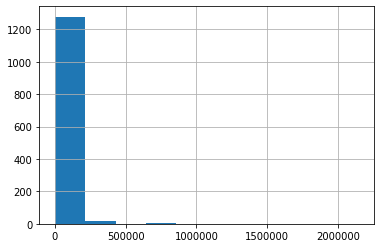

In [64]:
top100['avgviews_video'].hist()

#### Saving dataframe for the usage in the webapp
---

In [65]:
# Move timestamp col to the front
timestampCol = top100.pop('timestamp')
top100.insert(0, 'timestamp', timestampCol)
top100

,timestamp,ranking,id,user_id,user_name,type,viewer_count,language,follower_count,clip_count,mostviewed_clip,lowestviewed_clip,avgviews_clips,video_count,mostviewed_video,lowestviewed_video,avgviews_video
0,2020-08-22 00:35:36,0,39372082478,124420521,LCS,live,112074,en,1176855,20,261459,103947,145337.550000,20,29002,29002,29002
1,2020-08-22 00:35:36,1,39363352430,22510310,GamesDoneQuick,live,68353,en,1740145,19,399391,80038,157636.368421,20,44547,44547,44547
2,2020-08-22 00:35:36,2,395734242,39276140,Rubius,live,59623,es,5781553,20,41469,14861,22328.100000,20,850936,850936,850936
3,2020-08-22 00:35:36,3,39370454542,122375217,negaoryx,live,46860,en,98650,14,1060023,3726,84269.000000,20,425,425,425
4,2020-08-22 00:35:36,4,39370827390,37402112,shroud,live,45084,en,7798420,20,1142911,300452,487644.950000,20,395816,395816,395816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,2020-08-23 00:30:10,95,2499503793,44099416,Rakin,live,3822,pt,1259671,17,10718,1120,3079.588235,20,4728,4728,4728
1295,2020-08-23 00:30:10,96,39383431550,456427110,BeatportOfficial,live,3774,en,128558,20,16981,320,2271.600000,7,16539,16539,16539
1296,2020-08-23 00:30:10,97,39381754334,24765850,餐餐自由配,live,3766,zh,374855,20,20291,5469,7837.000000,20,14386,14386,14386
1297,2020-08-23 00:30:10,98,402016162,68062590,iGeStarK,live,3718,es,247985,20,2679,266,711.100000,20,9542,9542,9542


In [66]:
top100.to_csv('Data/Top100Combined.csv', index = False)